# Car Prices

A lasso regression model to predict car prices based on various features.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Create Sample Data

Let's simulate a real-world dataset where we attempt to predict car prices based on various features such as engine size, horsepower, fuel efficiency, and the age of the car.

- Create a sample data
- Assign the sample data to a variable as a DataFrame, `cars`
- Display the first five (5) rows

In [2]:
data = {
    'engine_size': [2.0, 2.4, 3.0, 3.5, 4.0, 2.0, 2.2, 2.5, 3.2, 3.6],
    'horsepower': [200, 220, 250, 300, 350, 180, 190, 230, 280, 320],
    'fuel_efficiency': [30, 28, 25, 20, 18, 32, 31, 27, 23, 19],
    'car_age': [5, 4, 3, 6, 7, 3, 4, 2, 5, 6],
    'price': [20000, 24000, 30000, 28000, 35000, 18000, 22000, 26000, 31000, 33000]
}

cars = pd.DataFrame(data)
cars.head()

,engine_size,horsepower,fuel_efficiency,car_age,price
0,2.0,200,30,5,20000
1,2.4,220,28,4,24000
2,3.0,250,25,3,30000
3,3.5,300,20,6,28000
4,4.0,350,18,7,35000


Here, we create a simple dataset with four features (`engine_size`, `horsepower`, `fuel_efficiency`, and `car_age`) and a target variable (`price`). This dataset will be used to train our Lasso Regression model.

## Define Features and Target Variable

- `X` contains the independent variables (features) that will be used to predict car prices
- `y` is the dependent variable (target) that represents the car price

In [3]:
X = cars[['engine_size', 'horsepower', 'fuel_efficiency', 'car_age']]
y = cars['price']

## Split Data into Training and Testing Sets

We split the dataset into training and testing sets. Here, 80% of the data is used for training the model, and 20% is reserved for testing its performance.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Standardize the Features

Standardization is essential in Lasso Regression because it ensures that all features contribute equally to the regularization process, preventing features with larger scales from dominating.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build and Train the Lasso Regression Model

`Lasso` regression model with `alpha=1.0`, which controls the strength of the regularization (penalty).
-  A higher alpha increases regularization, potentially setting more coefficients to zero, effectively selecting features

In [6]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

Lasso()

## Analyze the Coefficients

The coefficients output by the Lasso model show the impact of each feature on the target variable. In Lasso Regression, some coefficients may be shrunk to zero, indicating that those features are not important in predicting the target variable.

In [7]:
coefficients = pd.Series(lasso.coef_, index=X.columns)
print(f"Lasso Coefficients:\n{coefficients}")

Lasso Coefficients:
engine_size          -69.960188
horsepower         10115.872844
fuel_efficiency     3584.883465
car_age            -1337.426768
dtype: float64


Lasso regression analysis indicates that `horsepower` is a significant positive predictor of the target variable, while `engine_size` and `car_age` have negative impacts, with `fuel_efficiency` showing a moderately positive influence.

## Make Predictions (Lasso Regression)

- Use the trained model to predict car prices on the test set using the standardized test data

In [8]:
y_pred = lasso.predict(X_test_scaled)

## Evaluate the Model

- Mean Squared Error (MSE) measures the average squared difference between the observed and predicted values.
- R-squared (R²) indicates how well the model explains the variance in the target variable. An R² closer to 1 means the model explains most of the variance in the data.

*NOTE: A lower MSE indicates a better model fit.*

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Preview the Evaluation

In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7176844.935851052
R-squared: -27.70737974340421


The model exhibits **poor** predictive performance, indicated by a high Mean Squared Error and a negative R-squared value, suggesting it does not explain the variance in the data effectively.

## Visualize the Results

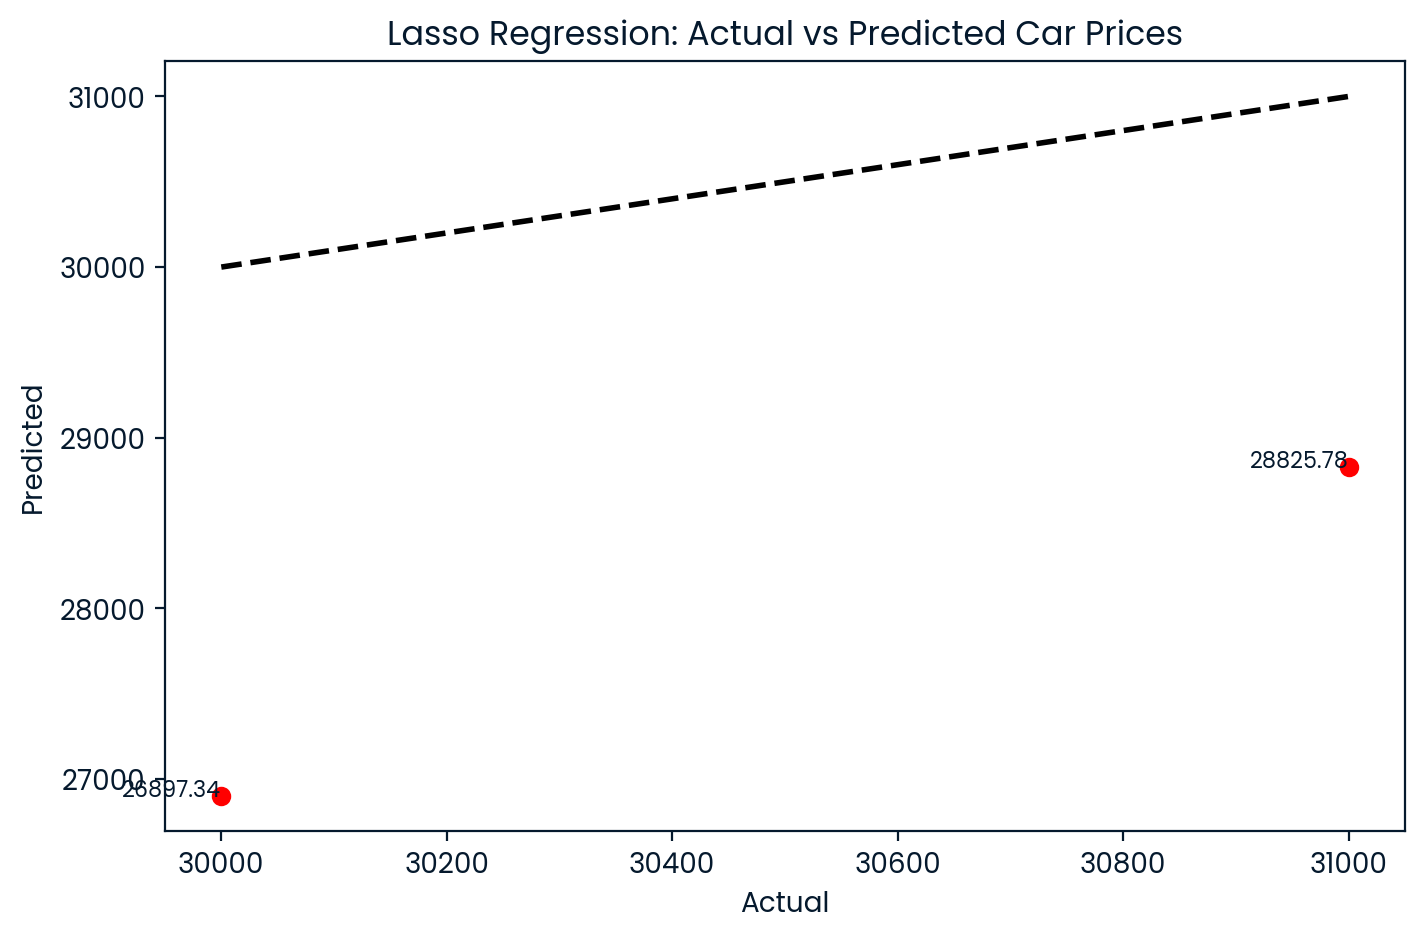

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='red')

for i in range(len(y_test)):
    plt.text(y_test.iloc[i], y_pred[i], f'{y_pred[i]:.2f}', fontsize=8, ha='right')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted Car Prices')
plt.show()

This plot visualizes the actual versus predicted car prices. The diagonal line represents a perfect prediction. Points close to this line indicate a better fit by the model.

## Tune the Regularization Parameter (Alpha)

Perform cross-validation to find the optimal alpha value. A smaller alpha reduces the regularization effect, while a larger alpha increases it. Use grid search or random search for hyperparameter tuning.

### Grid Search 

- Define the parameter grid

In [12]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

- Perform grid search with cross-validation

In [13]:
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

- Get the best model

In [14]:
best_lasso = grid_search.best_estimator_
print("Best alpha:", best_lasso.alpha)

Best alpha: 0.01


#### Make Predictions (Grid Search)

In [15]:
y_pred_gs = best_lasso.predict(X_test_scaled)

#### Evaluate the Model

In [16]:
mse_best = mean_squared_error(y_test, y_pred_gs)
r2_best = r2_score(y_test, y_pred_gs)

##### Preview the Evaluation

In [17]:
print(f"Best MSE: {mse_best}")
print(f"Best R-squared: {r2_best}")

Best MSE: 7287676.185493742
Best R-squared: -28.15070474197497


It seems that the model is still struggling to capture the underlying patterns in your data. A negative R-squared, especially one as large as -28, indicates that the model's predictions are worse than simply predicting the mean of the target variable.

#### Visualize the Results

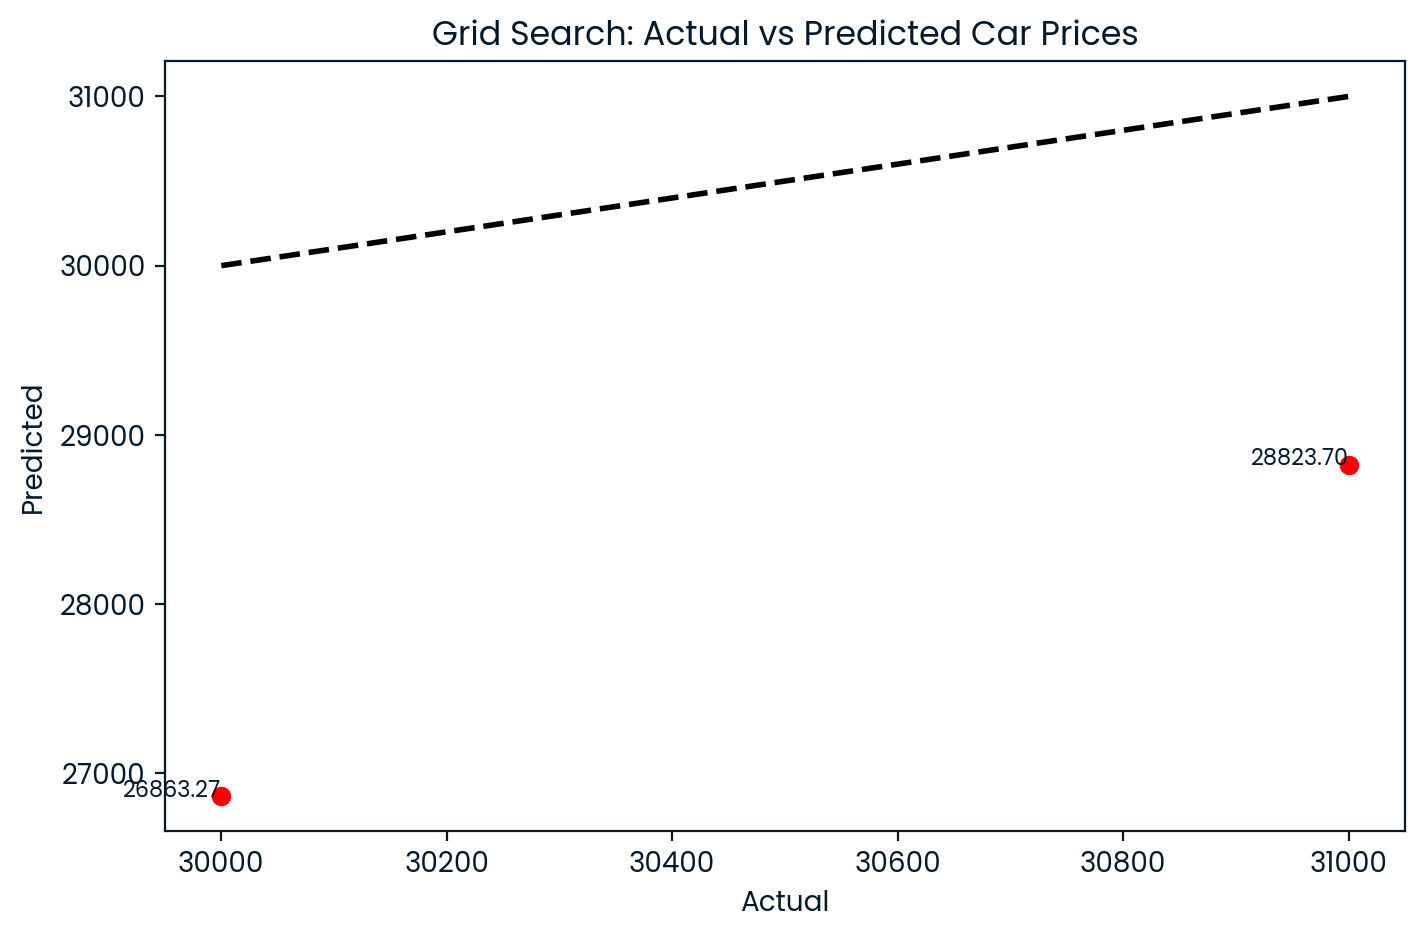

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gs, color='red')

for i in range(len(y_test)):
    plt.text(y_test.iloc[i], y_pred_gs[i], f'{y_pred_gs[i]:.2f}', fontsize=8, ha='right')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Grid Search: Actual vs Predicted Car Prices')
plt.show()

### RandomForestRegressor

- Train a Random Forest model

In [19]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### Make Predictions (RandomForestRegressor)

In [20]:
y_pred_rf = rf_reg.predict(X_test_scaled)

#### Evaluate the Model

In [21]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

##### Preview the Evaluation

In [22]:
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest MSE: 14717000.0
Random Forest R-squared: -57.868


It looks like the model's performance is still poor, which suggests that there might be deeper issues at play.

#### Visualize the Results

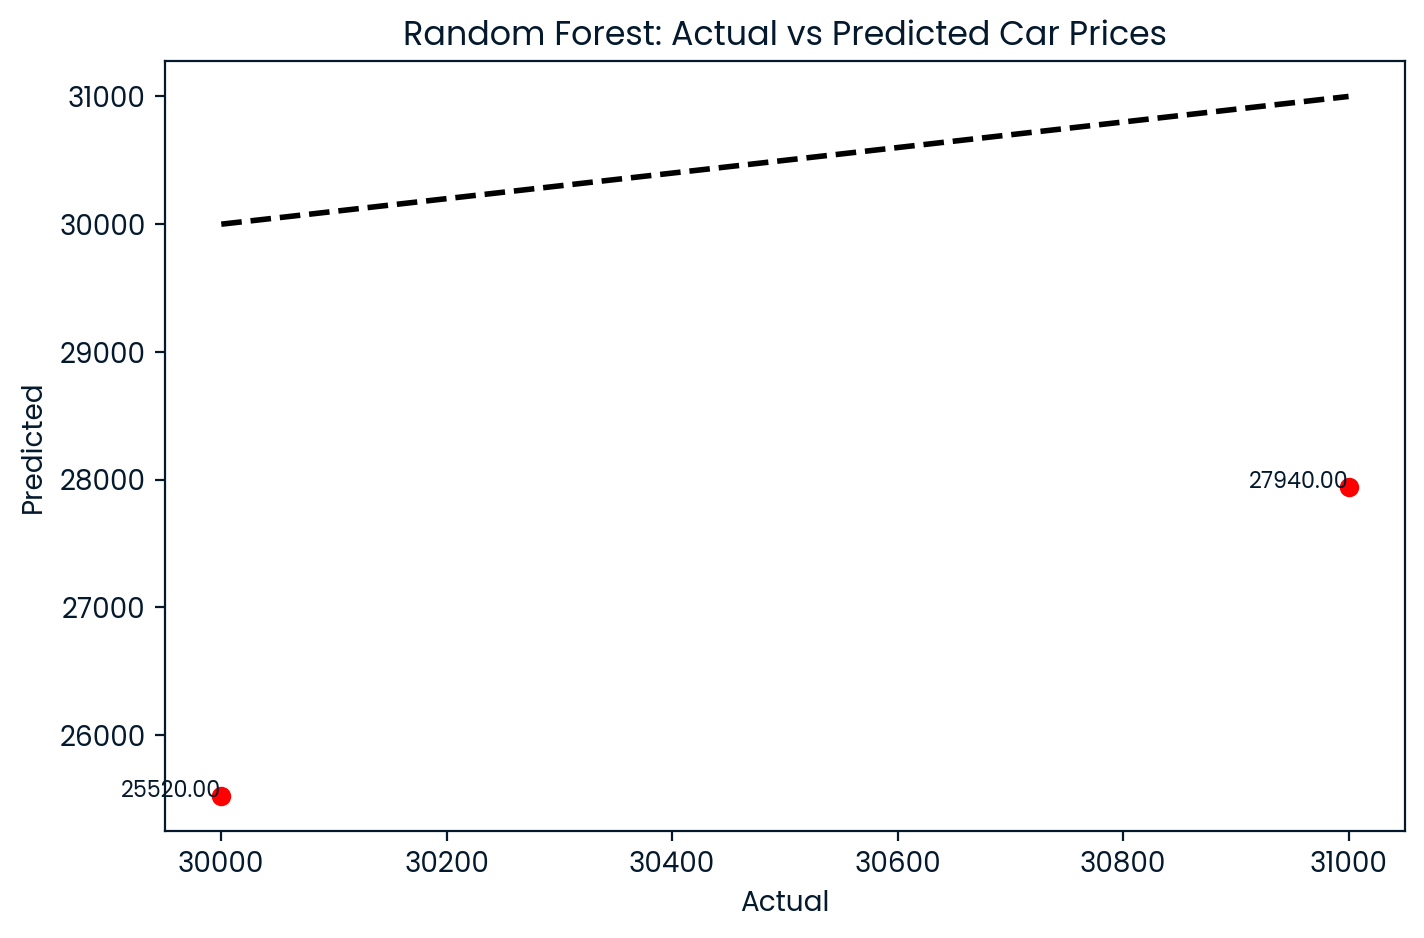

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='red')

for i in range(len(y_test)):
    plt.text(y_test.iloc[i], y_pred_rf[i], f'{y_pred_rf[i]:.2f}', fontsize=8, ha='right')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted Car Prices')
plt.show()